**SA463A &#x25aa; Data Wrangling and Visualization &#x25aa; Fall 2021 &#x25aa; Uhan**

# Lesson 11. Cartographic Visualization

## In this lesson...

- **Cartography** &mdash; the study and practice of map-making &mdash; has a rich history spanning centuries of discovery and design


- **Cartographic visualization** leverages mapping techniques to convey data containing spatial information, such as locations, routes, or trajectories on the surface of the Earth


- In this lesson, we'll learn about the basics of creating maps and visualizing spatial data with Altair

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Setup

- Let's start by importing our good friends, Pandas and Altair:

In [1]:
import pandas as pd
import altair as alt

- Let's also enable the JSON data transformer and the JupyterLab renderer
    - Don't forget to create a folder called `altair-data/`!

In [2]:
alt.data_transformers.enable('json', prefix='altair-data/')
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## The GeoJSON format and geoshape marks

- Up to this point in the course, we have worked with datasets in CSV files that correspond to tabular data: 
    - Rows $\leftrightarrow$ observations or records
    - Columns $\leftrightarrow$ variables or fields


- **Geographic data**, such as *geographic regions* (e.g., countries, states) and *trajectories* (e.g., flight paths, subway lines) usually come in different formats


- [GeoJSON](https://geojson.org/) is a format for encoding a variety of geographic data structures with JSON files


- A **GeoJSON feature** represents a spatially bounded thing (like a country)


- To illustrate, let's look at `data/maryland.geojson`, located in the same folder as this notebook, which contains a GeoJSON feature for the boundary of Maryland


- As you can see, the `feature` contains:
    - `properties`, like the `name` of the feature
    - a `geometry` that consists of a list of `coordinates` given by `[longitude, latitude]` coordinates that define the state boundary


- To visualize geographic data, Altair provides the `geoshape` mark type


- For example, we can create a Chart object based on the GeoJSON feature specified `data/maryland.geojson`, and apply the `mark_geoshape()` method, like this:

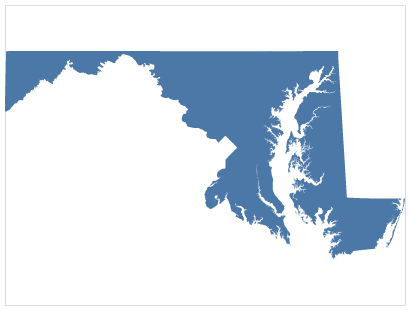

In [3]:
# Solution
alt.Chart('data/maryland.geojson').mark_geoshape()

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## The TopoJSON format

- [TopoJSON](https://github.com/topojson/topojson) is an extension of GeoJSON 


- A TopoJSON file can specify multiple GeoJSON features compactly by encoding the *topology* of geographic regions
    - In particular, encoding borders shared between features only once


- We can view TopoJSON data in a similar fashion to GeoJSON files, but with one additional step

- To illustrate, we're going to use a dataset from the `vega_datasets` Python package
    - This package provides access to a variety of [datasets hosted in the cloud by the Vega team](https://github.com/vega/vega-datasets)


- Let's import the `data` object `vega_datasets`:

In [4]:
from vega_datasets import data

- The `data` object contains pointers to a number of datasets


- For example, let's look at `data.world_110m`, which contains the boundaries of the world countries at a 110 meter resolution


- We can get the URL of this dataset like this:

In [5]:
world_url = data.world_110m.url

- Let's take a look at the contents of `world_url`:

In [6]:
world_url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json'

- We can also read this file as a Python *dictionary* using `data.world_110m` as a *method*, like this:

In [7]:
world = data.world_110m()

- Let's take a look at the dictionary:

In [8]:
world

{'type': 'Topology',
 'transform': {'scale': [0.0036000360003600037, 0.0016925586033320111],
  'translate': [-180, -85.60903777459777]},
 'objects': {'land': {'type': 'MultiPolygon',
   'arcs': [[[0]],
    [[1]],
    [[2]],
    [[3]],
    [[4]],
    [[5]],
    [[6]],
    [[7, 8, 9]],
    [[10, 11]],
    [[12]],
    [[13]],
    [[14]],
    [[15]],
    [[16]],
    [[17]],
    [[18]],
    [[19]],
    [[20]],
    [[21]],
    [[22]],
    [[23]],
    [[24]],
    [[25]],
    [[26]],
    [[27]],
    [[28]],
    [[29, 30]],
    [[31]],
    [[32]],
    [[33]],
    [[34]],
    [[35]],
    [[36]],
    [[37]],
    [[38]],
    [[39]],
    [[40]],
    [[41]],
    [[42, 43]],
    [[44]],
    [[45]],
    [[46]],
    [[47, 48, 49, 50]],
    [[51]],
    [[52]],
    [[53]],
    [[54]],
    [[55]],
    [[56]],
    [[57]],
    [[58]],
    [[59]],
    [[60]],
    [[61]],
    [[62, 63]],
    [[64]],
    [[65]],
    [[66]],
    [[67]],
    [[68]],
    [[69]],
    [[70]],
    [[71]],
    [[72]],
    [[73]],
   

- As a result, we can, at a high level, quickly see the `'objects'` of `data.world_110m`:

In [9]:
world['objects'].keys()

dict_keys(['land', 'countries'])

- Roughly speaking, each `object` in a TopoJSON file corresponds to a collection of GeoJSON features


- To use a TopoJSON file with a Chart object, we need to use a helper function, `alt.topo_feature()`, that extracts all the GeoJSON features from a particular TopoJSON `object`


- For example, we can visualize the `land` object in `data.world_110m` like this:

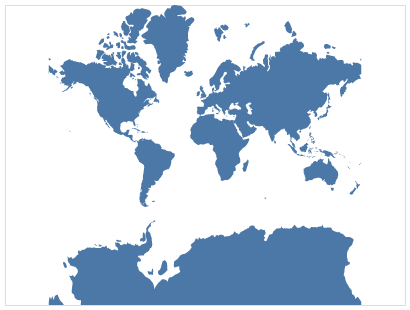

In [10]:
# Solution
alt.Chart(
    alt.topo_feature(world_url, 'land')
).mark_geoshape()

- Note that `alt.topo_feature()` takes the URL as the first argument, not the dataset itself


- Similarly, for the `countries` object:

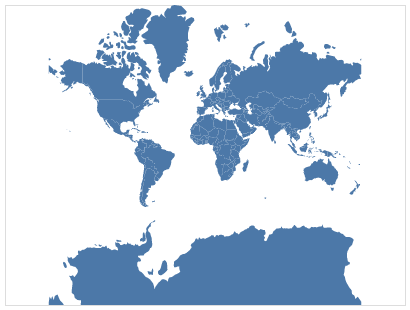

In [11]:
# Solution
alt.Chart(
    alt.topo_feature(world_url, 'countries')
).mark_geoshape()

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Geoshape mark properties and projections

- We can customize the fill color, stroke color, and stroke widths using standard mark properties:

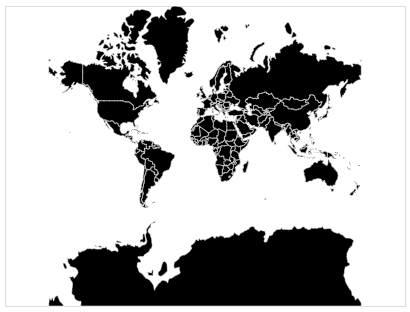

In [12]:
# Solution
alt.Chart(
    alt.topo_feature(world_url, 'countries')
).mark_geoshape(
    fill='black',
    stroke='white',
    strokeWidth=0.5
)

- We can also change the default projection of the map using the `.project()` method, like this:

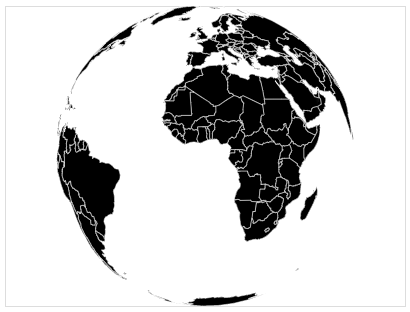

In [13]:
# Solution
alt.Chart(
    alt.topo_feature(world_url, 'countries')
).mark_geoshape(
    fill='black',
    stroke='white',
    strokeWidth=0.5
).project(
    type='orthographic'
)

- The default projection `type` is `'mercator'`


- There is a wide assortment of available projections
    - [Vega documentation on the available cartographic projections](https://vega.github.io/vega/docs/projections/#types)


- You can also use the `.project()` method to zoom into a particular part of the map with the following keyword arguments:
    - `scale=...` specifies the magnification level as a number
    - `translate=...` takes a 2-element list `[tx, ty]`, which specifies the pixel coordinates of the projection's center


- You'll need to play around a bit with these keyword arguments to zoom into the part of the map you want


- We can focus on Europe in the `'mercator'` projection like this:

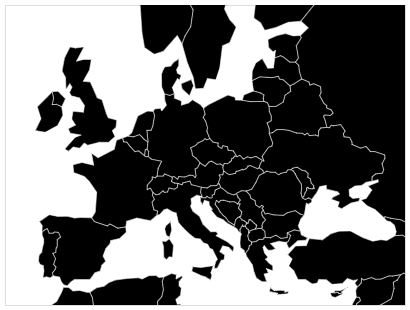

In [14]:
# Solution
alt.Chart(
    alt.topo_feature(world_url, 'countries')
).mark_geoshape(
    fill='black',
    stroke='white',
    strokeWidth=0.5
).project(
    type='mercator',
    scale=400,
    translate=[100, 550]
)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Point and symbol maps

- Many tabular datasets include geographic information such as:
    - longitude and latitude coordinates
    - references to geographic regions that can be mapped to coordinates (e.g. country names, postal codes)


- We can combine this data with the *geometric* data in a GeoJSON or TopoJSON file to create maps with points or symbols

- In the same folder as this notebook, there is a CSV file `data/airports.csv` that contains a dataset of airports in the United States

- Let's take a look:

In [15]:
airports_df = pd.read_csv('data/airports.csv')
airports_df.head()

,iata,name,city,state,latitude,longitude,routes
0,00M,Thigpen,Bay Springs,MS,31.953765,-89.234505,0
1,00R,Livingston Municipal,Livingston,TX,30.685861,-95.017928,0
2,00V,Meadow Lake,Colorado Springs,CO,38.945749,-104.569893,0
3,01G,Perry-Warsaw,Perry,NY,42.741347,-78.052081,0
4,01J,Hilliard Airpark,Hilliard,FL,30.688012,-81.905944,0


- The CSV file contains the following columns:

| Column | Description |
| :- | :- |
| `iata` | Airport code |
| `name` | Name of airport |
| `city` | City of airport |
| `state` | State of airport |
| `latitude` | Latitude of airport |
| `longitude` | Longitude of airport |
| `routes` | Number of routes originating from airport |

- Let's create a map that shows the location of each airport in this dataset


- First, let's create a base layer containing a map of the US, including the state boundaries, using the `data.us_10m` dataset from `vega_datasets`


- We start by getting the URL of this dataset, like this:

In [16]:
us_url = data.us_10m.url
us_url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/us-10m.json'

- Let's also read in the actual TopoJSON file as a dictionary, so we can peek at the structure and determine the objects available to us:

In [17]:
us = data.us_10m()
us['objects'].keys()

dict_keys(['counties', 'states', 'land'])

- There is a `states` object! That seems promising &mdash; let's try it out


- Let's configure our map as follows: 
    - fill color of `'lightgray'`
    - stroke color of `'white'`
    - stroke width of `1`
    - `'albersUsa'` projection


- As the name suggests, the `'albersUsa'` projection is well-suited for visualizations involving the US


- So, we can create our base layer map like this:

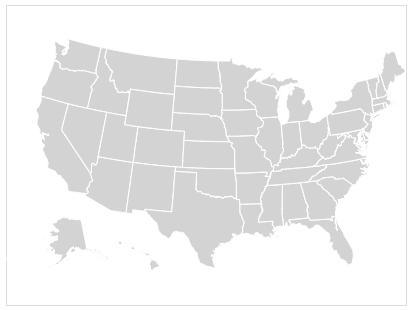

In [18]:
# Solution
base = alt.Chart(
    alt.topo_feature(us_url, 'states')
).mark_geoshape(
    fill='lightgray', stroke='white', strokeWidth=1
).project(
    type='albersUsa'
)

base

- Next, we'll create a layer of points corresponding to the locations of the airports


- We'll represent each observation/airport by a circle using `.mark_circle()`
    - Let's make the points smaller than the default size, say `size=8`


- To put the points in the correct places, we'll use the `Longitude` and `Latitude` encoding channels
    - Note that we *don't* simply use the `alt.X()` and `alt.Y()` channels
    - There is no guarantee that `longitude` → `x` and `latitude` → `y`!


- Finally, let's add a tooltip that displays the corresponding airport code when the user mouses over each circle


- So, something like this:

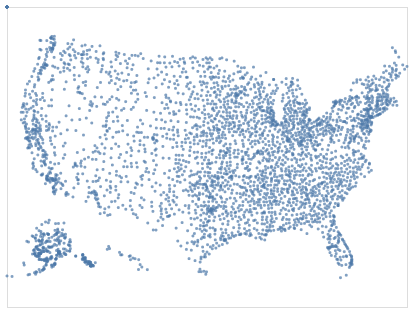

In [19]:
# Solution
points = alt.Chart(airports_df).mark_circle(
    size=8
).encode(
    alt.Latitude('latitude:Q'),
    alt.Longitude('longitude:Q'),
    alt.Tooltip('iata:N')
).project(
    type='albersUsa'
)

points

- Now, let's layer the two charts on top of each other, make our chart a little larger, and remove the rectangular border:

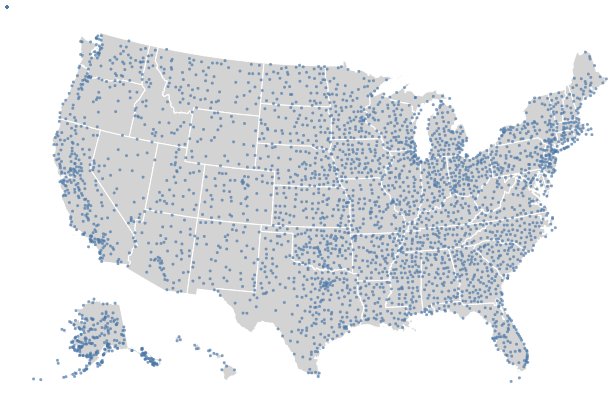

In [20]:
# Solution
(base + points).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

- It would be nice to see the relative traffic of the airports &mdash; this way, we can identify major hubs


- Let's modify the map we created above to visualize the number of routes with the `Size` encoding channel:

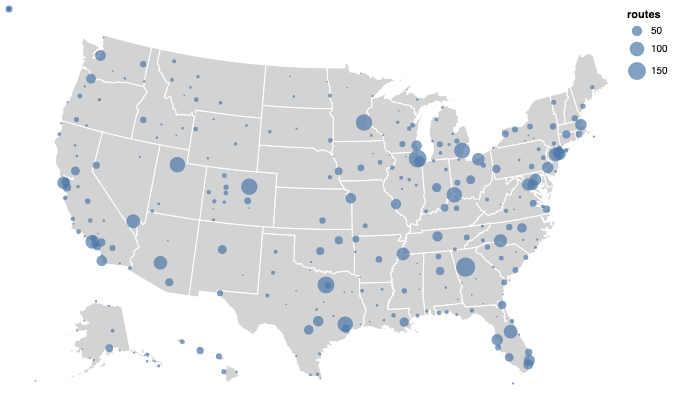

In [21]:
# Solution
base = alt.Chart(
    alt.topo_feature(us_url, 'states')
).mark_geoshape(
    fill='lightgray', stroke='white', strokeWidth=1
).project(
    type='albersUsa'
)

points = alt.Chart(airports_df).mark_circle(
    size=8
).encode(
    alt.Latitude('latitude:Q'),
    alt.Longitude('longitude:Q'),
    [alt.Tooltip('iata:N'), alt.Tooltip('routes:Q')],
    alt.Size('routes:Q'),
    alt.Order('routes:Q', sort='descending')
).project(
    type='albersUsa'
)

(base + points).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

- *Food for thought.* What's the deal with the circles in the upper-left corner?

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Choropleth maps and the lookup transform

- A **choropleth map** uses shaded or textured regions to visualize data values


- Sized symbol maps, like the one we just created above, are often more accurate to read
    - People tend to be better at estimating proportional differences between the area of circles than between color shades


- Nevertheless, choropleth maps are useful when too many symbols become perceptually overwhelming

- To illustrate, let's build a choropleth map of the unemployment rate per county, back in the recession year of 2008


- We'll base our visualization on two datasets, both from `vega_datasets`: 
    1. a *tab-separated values* (TSV) file that contains unemployment statistics (`data.unemployment`)
    2. a TopoJSON file that includes county boundary features (`data.usa_10m`)


- Let's store the URL of the unemployment data:

In [22]:
unemp_url = data.unemployment.url
unemp_url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/unemployment.tsv'

- We can also peek at the structure of this dataset by downloading it in our browser


- We see there are two columns:

| Column | Description |
| :- | :- |
| `id` | [County FIPS code](https://en.wikipedia.org/wiki/List_of_United_States_FIPS_codes_by_county) |
| `rate` | Unemployment rate |

- Earlier, we stored 
    - the URL of `data.usa_10m` in the variable `us_url`
    - the dataset as a dictionary in the variable `us`


- Digging into the dictionary `us`, we saw that one of the objects in this TopoJSON dataset is `counties`

In [23]:
us['objects']['counties'].keys()

dict_keys(['type', 'geometries'])

- Digging a bit deeper into the `counties` object, we see  that it contains a list of `geometries`, each of which has an `id`

In [24]:
us['objects']['counties']['geometries']

[{'type': 'MultiPolygon', 'arcs': [], 'id': 22051},
 {'type': None, 'id': 23023},
 {'type': None, 'id': 37031},
 {'type': None, 'id': 42045},
 {'type': 'Polygon',
  'arcs': [[0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25],
   [26],
   [27],
   [28],
   [29],
   [30],
   [31],
   [32],
   [33],
   [34],
   [35],
   [36],
   [37],
   [38],
   [39],
   [40],
   [41],
   [42],
   [43],
   [44],
   [45],
   [46],
   [47],
   [48],
   [49],
   [50],
   [51],
   [52],
   [53],
   [54],
   [55],
   [56],
   [57],
   [58],
   [59],
   [60],
   [61],
   [62],
   [63],
   [64],
   [65],
   [66],
   [67],
   [68],
   [69],
   [70],
   [71],
   [72],
   [73],
   [74],
   [75],
   [76],
   [77],
   [78],
   [79],
   [80],
   [81],
   [82],
   [83],
   [84],
   [85],
   [86],
   [87],
   [88],
   [89],
   [90],
   [91, 92],
   [93],
   [94]],
  'id': 53000

- It turns out that `id` corresponds to the FIPS code of a county


- So, we can use these county FIPS codes to match the geographic data in `data.usa_10m` with the unemployment data in `data.unemployment`


- How? Let's start by making a map of the US counties:

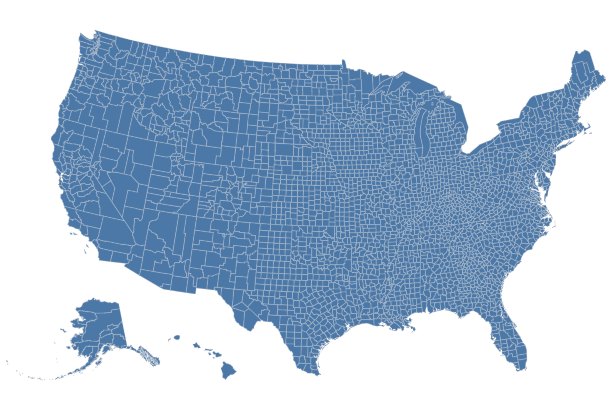

In [25]:
alt.Chart(
    alt.topo_feature(us_url, 'counties')
).mark_geoshape(
    stroke='lightgray',
    strokeWidth=0.25
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

- Next, we can use a *lookup transform* to retrieve the values of `rate` in `unemp_url` for each value of `id` that matches between `unemp_url` and `us_url`


- Then, we can encode the values of `rate` with `alt.Color()`

- The **lookup transform** extends the primary dataset given to a Chart object by looking up values from a secondary dataset


- The `.transform_lookup()` method takes the following keyword arguments:
    - `lookup=...` specifies the variable in the Chart's primary dataset that we'll use as a key to look up values in the secondary dataset
    - `from_=...` takes an `alt.LookupData` object which specifies the secondary dataset


- The `alt.LookupData()` function takes the following keyword arguments:
    - `data=...` specifies the secondary dataset
    - `key=...` specifies the variable in the secondary dataset to use as a key
        - The values of this variable should match values of the variable specified in `lookup=...` in `.transform_lookup()`
    - `fields=...` specifies a list of variables in the secondary dataset to extract


- Let's put this all together:

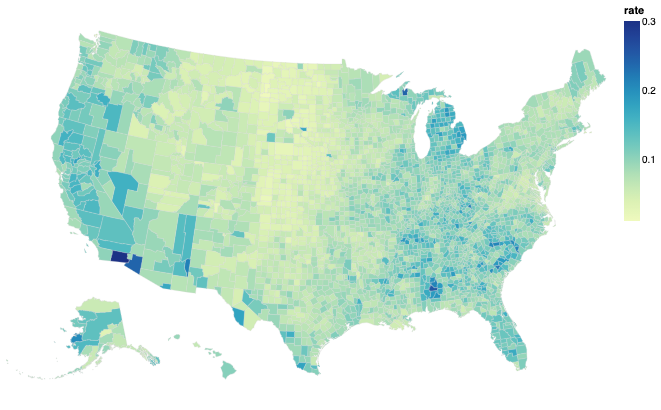

In [26]:
# Solution
alt.Chart(
    alt.topo_feature(us_url, 'counties')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=unemp_url, key='id', fields=['rate'])
).mark_geoshape(
    stroke='lightgray',
    strokeWidth=0.25
).encode(
    alt.Color('rate:Q'),
    alt.Tooltip('rate:Q')
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Problems

### Problem 1

The `vega_datasets` package has a tabular dataset `data.zipcodes` of 5-digit zip codes in the United States. In particular, each row contains the `longitude` and `latitude` for the post office in each `zip_code`.

Create a map of the United States, with state boundaries, that represents each post office location with a 1-pixel square mark. You should end up with something that looks like this:

![](img/problem1.svg)

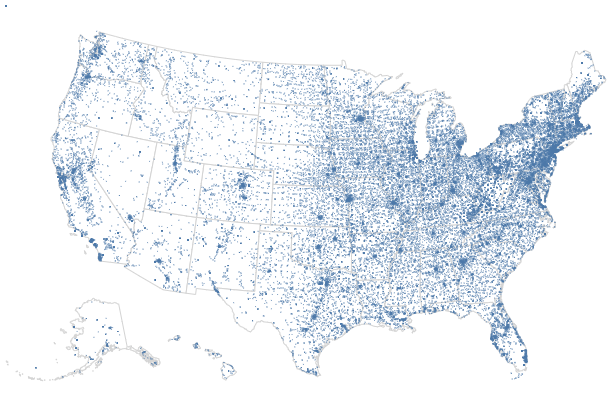

In [27]:
# Solution
from vega_datasets import data
zipcodes_url = data.zipcodes.url

base = alt.Chart(
    alt.topo_feature(us_url, 'states')
).mark_geoshape(
    fill='white', stroke='lightgray', strokeWidth=1
).project(
    type='albersUsa'
)

points = alt.Chart(zipcodes_url).mark_square(
    size=1
).encode(
    alt.Longitude('longitude:Q'),
    alt.Latitude('latitude:Q')
).project(
    type='albersUsa'
)

(base + points).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

### Problem 2

Is there any rhyme or reason to how the zip codes are allocated?

Modify the map you created in Problem 1 by coloring the point for each zip code based on the *first digit* of the zip code.

*Hint.* Create a new variable containing the first digit of each zip code. In the Vega expression syntax, you can get the first character of a string-valued `variable` with `datum.variable[0]`, similar to what you would do in Python.

What do you see?

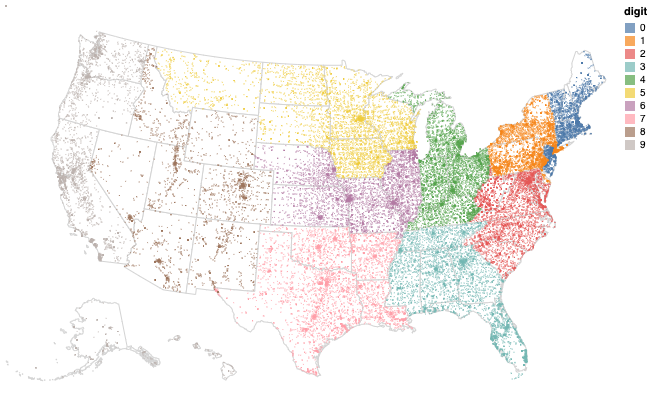

In [28]:
# Solution
from vega_datasets import data
zipcodes_url = data.zipcodes.url

base = alt.Chart(
    alt.topo_feature(us_url, 'states')
).mark_geoshape(
    fill='white', stroke='lightgray', strokeWidth=1
).project(
    type='albersUsa'
)

points = alt.Chart(
    zipcodes_url
).transform_calculate(
    digit='datum.zip_code[0]'
).mark_square(
    size=1
).encode(
    alt.Longitude('longitude:Q'),
    alt.Latitude('latitude:Q'),
    alt.Color('digit:N')
).project(
    type='albersUsa'
)

(base + points).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

### Problem 3

The `vega_datasets` package has a tabular dataset `data.population_engineers_hurricanes`.

1. Poke around the [vega-datasets website](https://github.com/vega/vega-datasets) and see if you can figure out what this dataset contains. See if you can find a description of the source of the data, as well as a preview of the data file itself.


2. The `'states'` object of the TopoJSON dataset `data.us_10m` that we used earlier in this lesson contains a list of `geographies`, each of which has an associated `id` value. These values turn out to be the [state FIPS codes](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standard_state_code). Is there something similar in `data.population_engineers_hurricanes`? Do some Google sleuthing to verify your hunch.


3. Use `data.us_10m` and `data.population_engineers_hurricanes` to create a chloropleth map of the United States that shows the population of each state with color. You should end up with something that looks like this:

![](img/problem3.svg)

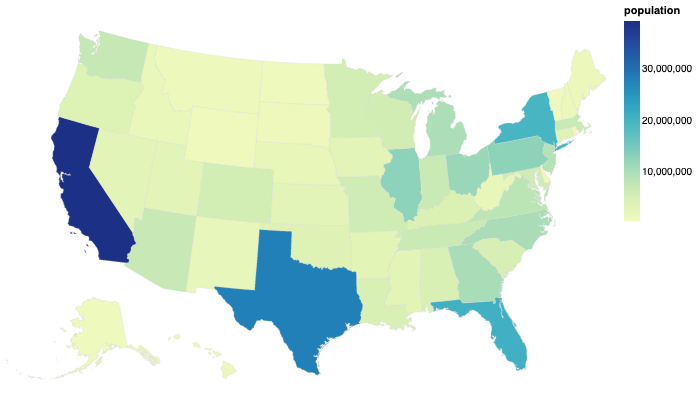

In [29]:
# Solution
from vega_datasets import data
eng_url = data.population_engineers_hurricanes.url

alt.Chart(
    alt.topo_feature(us_url, 'states')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(data=eng_url, key='id', fields=['population'])
).mark_geoshape(
    stroke='lightgray',
    strokeWidth=0.25
).encode(
    alt.Color('population:Q')
).project(
    type='albersUsa'
).properties(
    width=600,
    height=400
).configure_view(
    strokeWidth=0
)

<hr style="border-top: 2px solid gray; margin-top: 1px; margin-bottom: 1px"></hr>

## Notes and sources

- These lesson notes are based on the [Visualization Curriculum](https://uwdata.github.io/visualization-curriculum/) by the University of Washington

- [Altair example gallery of map visualizations](https://altair-viz.github.io/gallery/index.html#maps)
